In [2]:
import numpy as np
import emcee

In [3]:
def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0

In [4]:
ndim = 50

means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

In [5]:
icov = np.linalg.inv(cov)
icov

array([[ 4569.32721243,  1649.02791658,  -226.22457095, ...,
         -652.00371283, -1578.85027295,   815.42949042],
       [ 1649.02791658,   601.38602773,   -81.04443964, ...,
         -236.44785992,  -571.30516305,   293.15943256],
       [ -226.22457095,   -81.04443964,    13.48812574, ...,
           31.63774473,    79.38909582,   -40.12141849],
       ...,
       [ -652.00371283,  -236.44785992,    31.63774473, ...,
           98.5656679 ,   224.94293113,  -116.1402248 ],
       [-1578.85027295,  -571.30516305,    79.38909582, ...,
          224.94293113,   548.11589098,  -280.58151691],
       [  815.42949042,   293.15943256,   -40.12141849, ...,
         -116.1402248 ,  -280.58151691,   147.09798135]])

In [6]:
nwalkers = 250
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [7]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])

In [9]:
pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [10]:
sampler.run_mcmc(pos, 1000)

(array([[-4.38252517, -0.12927011, -0.65799899, ..., -0.75047415,
         -1.50135091, -3.00523218],
        [-0.47170324,  1.00096748,  1.31032215, ..., -1.64176611,
          1.09574613,  1.42114428],
        [ 2.84330073,  2.53204789, -1.40906236, ..., -1.635766  ,
          5.58791383,  0.17650337],
        ...,
        [-1.31801599,  2.6150006 , -3.25900568, ...,  1.20001899,
          0.279695  ,  2.12647992],
        [-3.43968572, -1.50001115,  0.87406067, ..., -1.29098399,
          0.69146265,  0.77521614],
        [ 0.92668429,  0.14075794,  2.9250658 , ...,  2.15020666,
         -2.34730894,  2.21119108]]),
 array([-20.44016204, -15.93018203, -34.92443127, -32.53149756,
        -29.35767343, -22.26642686, -26.59751834, -24.00759601,
        -24.8145144 , -28.00052289, -27.29279042, -25.04097188,
        -20.65887922, -28.32471941, -32.11380855, -22.32181377,
        -30.97467267, -29.14523669, -32.64269937, -27.09043614,
        -23.90436578, -28.24021607, -19.60994852, -17

/scratch/seismo/bellinger/python/anaconda3-5.3.0/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


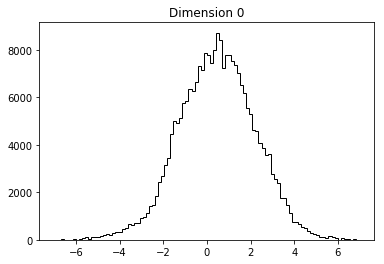

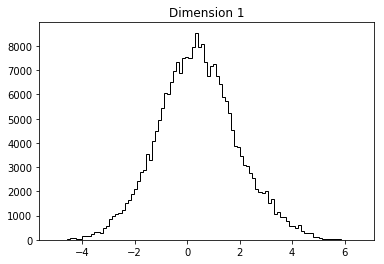

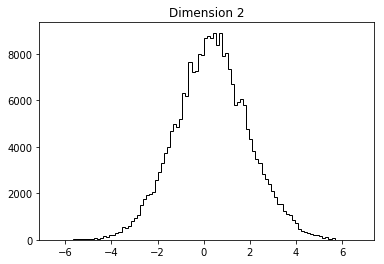

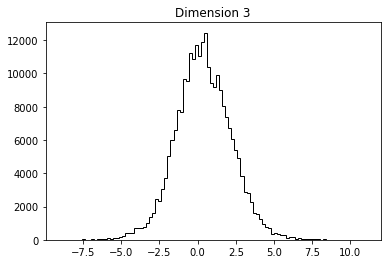

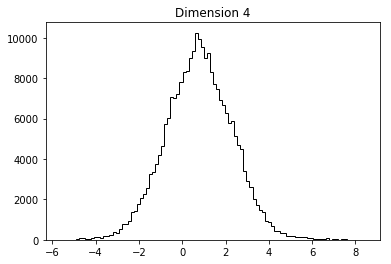

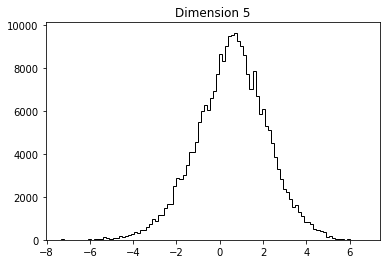

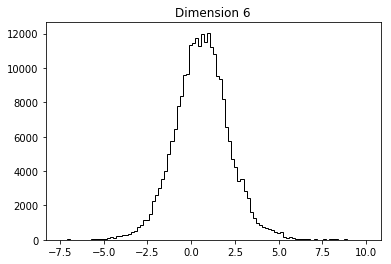

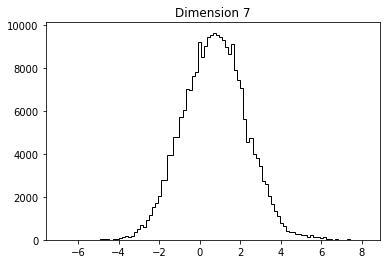

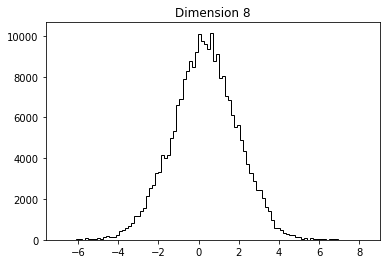

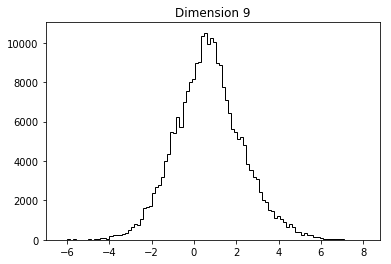

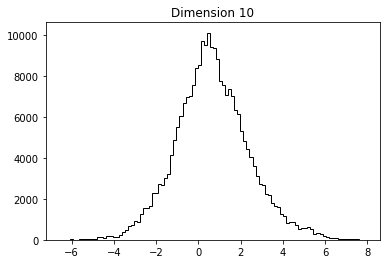

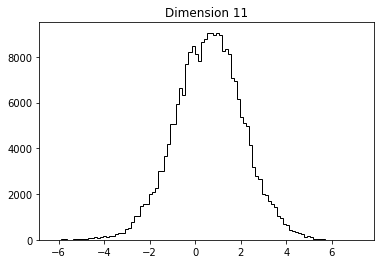

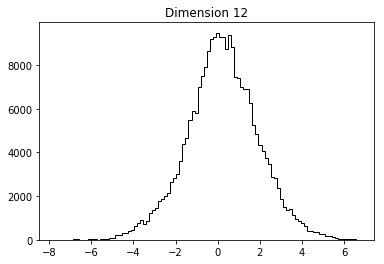

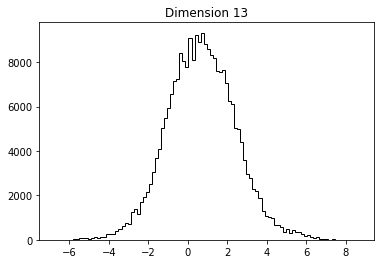

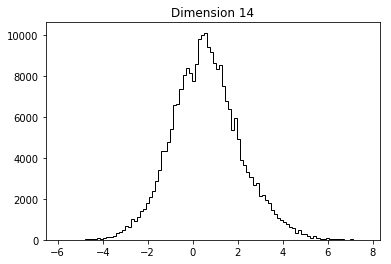

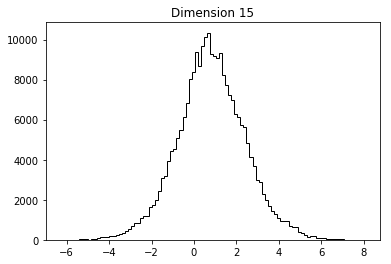

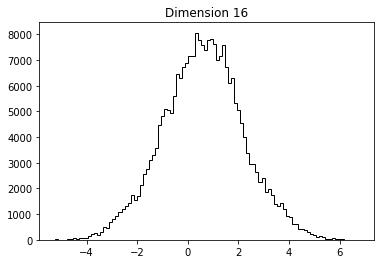

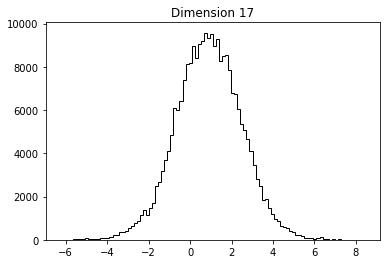

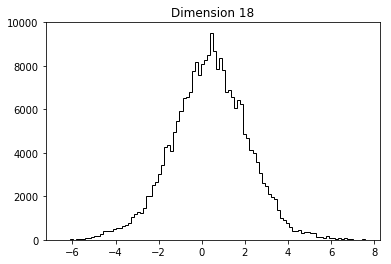

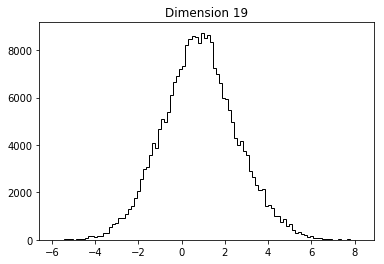

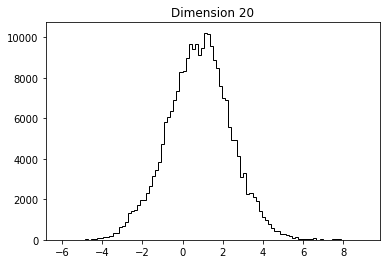

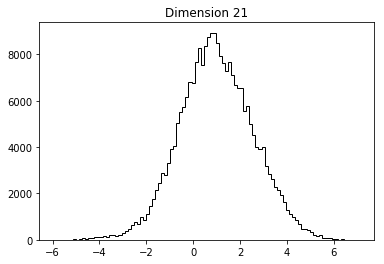

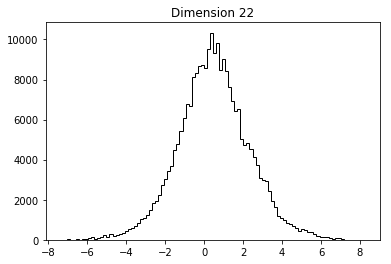

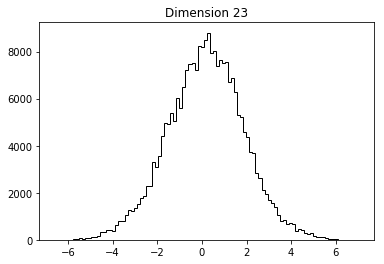

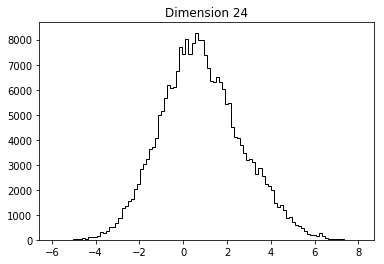

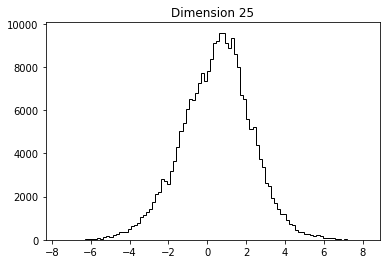

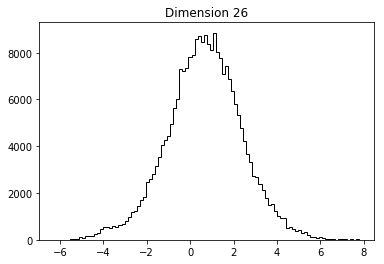

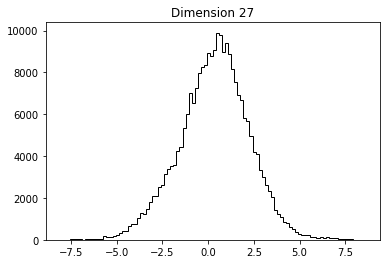

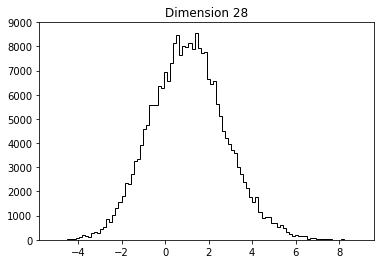

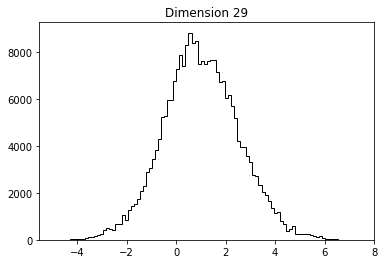

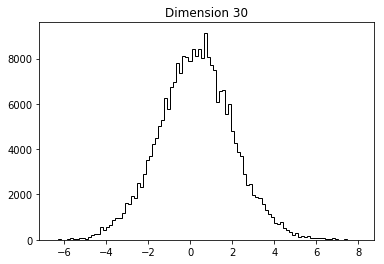

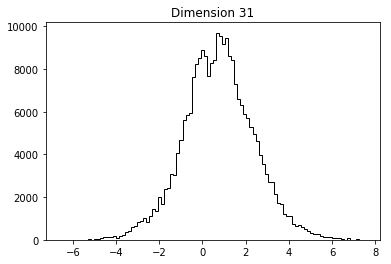

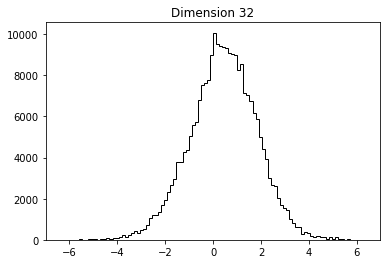

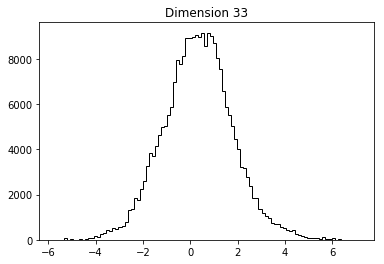

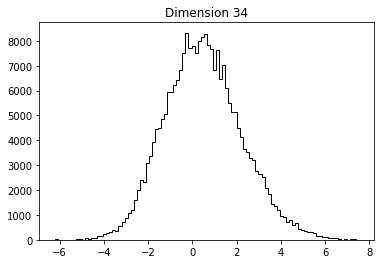

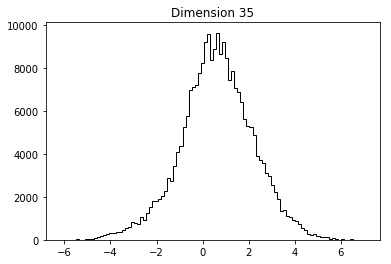

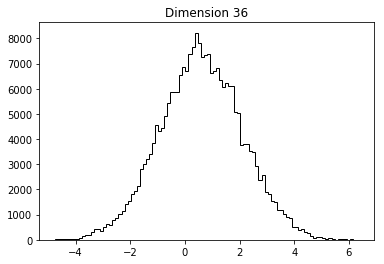

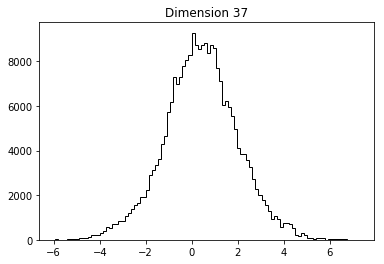

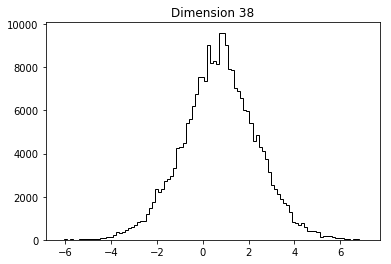

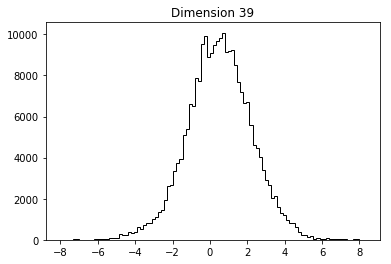

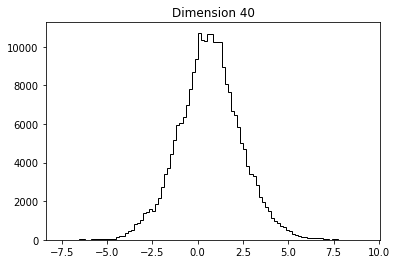

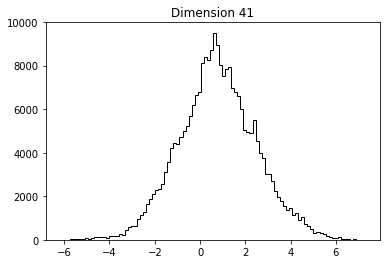

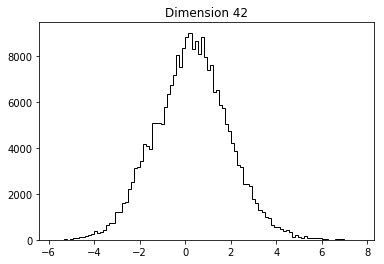

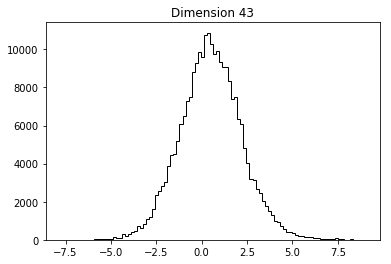

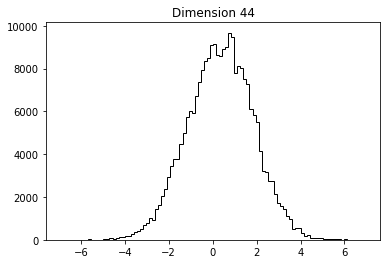

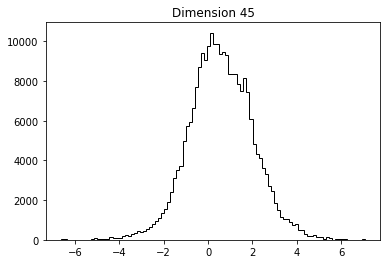

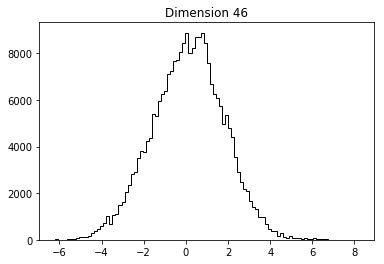

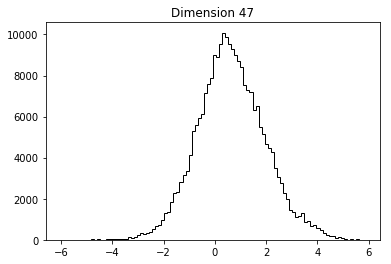

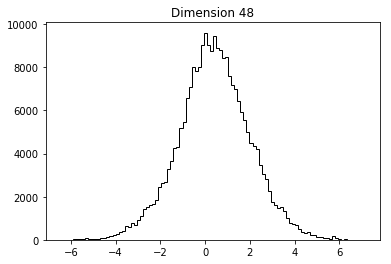

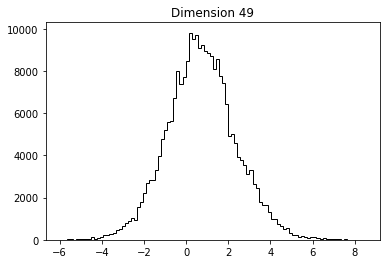

In [11]:
%matplotlib inline
import matplotlib.pyplot as pl

for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()

In [12]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.190
